## Env Setup

In [54]:
#%pip install ipykernel

In [55]:
# Create a virtual environment
#!python3 -m venv .venv

# Activate the virtual environment
#!source .venv/bin/activate

# Activate the virtual environment and install the required libraries
#!./.venv/bin/python -m pip install pandas numpy matplotlib statsmodels scipy ipykernel

In [56]:
#%pip install numpy matplotlib statsmodels scipy pandas

## Analysis

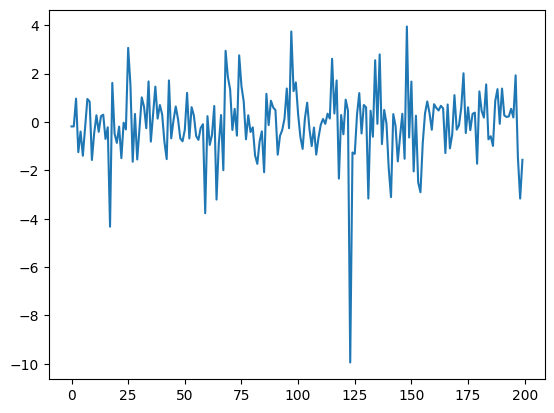

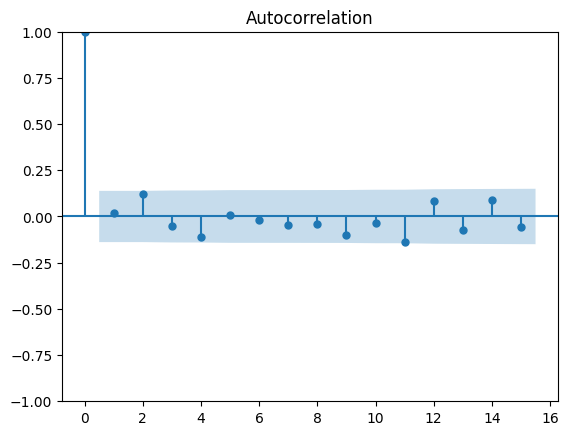

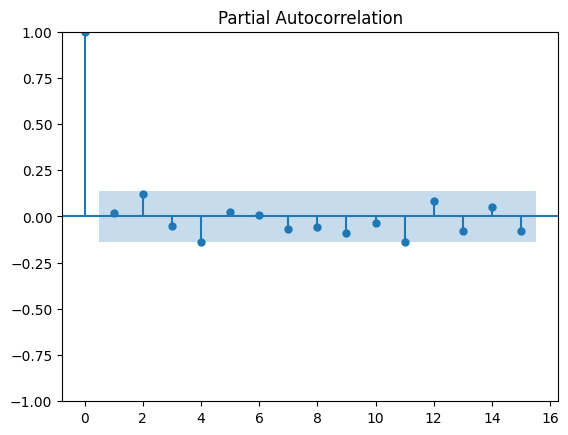

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Session2sim.csv', sep = ";", decimal = ",")
series1 = data.iloc[:200,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series3 # CHANGE THE SERIES HERE

num_lags=15 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()

In [58]:
#%pip install scipy

from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

# Skewness = asymmetry of the data
# Kurtosis = shape of the tail
print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)

# t-test for the mean with Ho equal to zero
# This test checks if the mean of the dataset y is significantly different from zero (the null hypothesis)
# t-statistic indicates the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error
# p_value helps determine the significance of the results

t_statistic, p_value = stats.ttest_1samp(y, 0)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Mean -0.089085 Standard deviation 1.4460662217806624 Skewness -1.5796889495802446 Kurtosis 10.30251305885045
T-statistic: -0.8690463519720814
P-value: 0.38586870506297277


## Series 2
#### **Here is an interpretation of your statistical results:**

Mean (0.131455): This is the average value of your dataset. It indicates that the central tendency of your data is around 0.131.

Standard Deviation (0.997063): This measures the amount of variation or dispersion in your dataset. A standard deviation close to 1 suggests that the data points are spread out around the mean.

Skewness (0.004809): This measures the asymmetry of the data distribution. A skewness close to 0 indicates that the data is fairly symmetrical.

Kurtosis (-0.274893): This measures the "tailedness" of the data distribution. A negative kurtosis indicates that the distribution has lighter tails and is flatter than a normal distribution.

T-statistic (1.859863): This is the result of the one-sample t-test, which tests whether the mean of your dataset is significantly different from zero.

P-value (0.064381): This indicates the probability of obtaining the observed results if the null hypothesis (mean is zero) is true. A p-value greater than 0.05 suggests that there is not enough evidence to reject the null hypothesis at the 5% significance level.

In summary, your dataset has a mean slightly above zero, is fairly symmetrical, and has a flatter distribution than normal. The t-test suggests that the mean is not significantly different from zero at the 5% significance level.

In [59]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -7.518682756005703
p-value: 3.842094173637216e-11


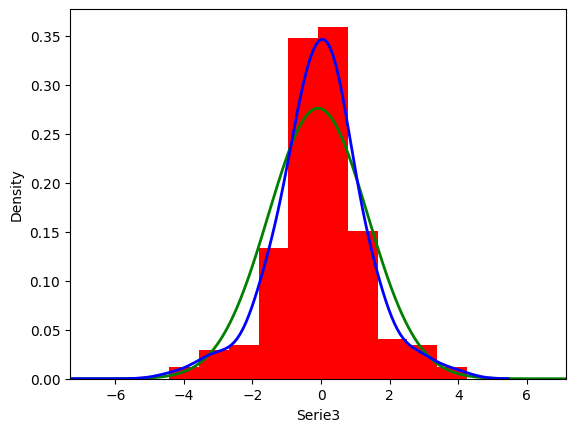

In [60]:
#%pip install seaborn

import seaborn as sns
import scipy.stats as st

mu = np.mean(y)
sigma = np.std(y)
x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()




### Is the data normally distributed?


In [61]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
print("")
print("Box test")
box_test = sm.stats.acorr_ljungbox(y, lags=[25])
box_test


Saphiro ShapiroResult(statistic=np.float64(0.8939932549830492), pvalue=np.float64(1.0591335659359182e-10))

Box test


,lb_stat,lb_pvalue
25,29.604928,0.239423


## Series 2
The Shapiro-Wilk test is used to check the normality of your data. Here are the results:

Statistic (0.997439): This is the test statistic for the Shapiro-Wilk test. A value close to 1 indicates that the data is likely to be normally distributed.
P-value (0.986589): This indicates the probability of obtaining the observed results if the data is normally distributed. A p-value greater than 0.05 suggests that there is no significant deviation from normality.

**In summary, the data appears to be normally distributed based on the Shapiro-Wilk test, as the p-value is much greater than 0.05.**

--------------------------------------------------------- 

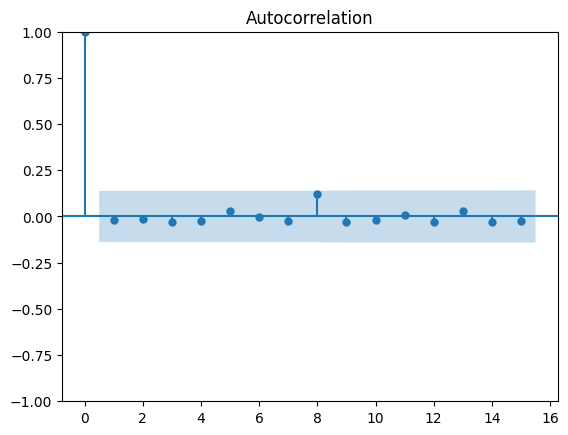

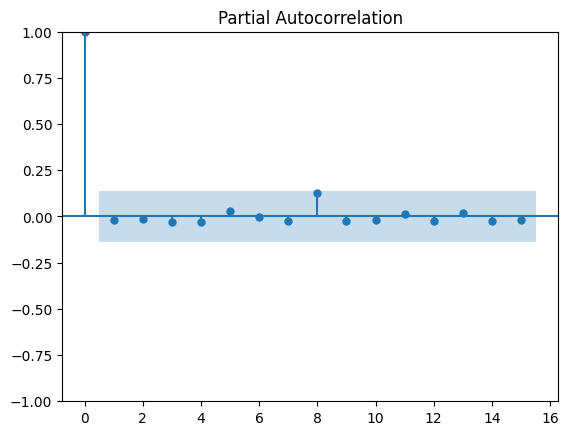

In [62]:
# plt.plot(y**2)
# plt.show()
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [63]:
box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
print("Ljung-Box for the squares") 
box_test2


Ljung-Box for the squares


,lb_stat,lb_pvalue
20,6.525506,0.997976


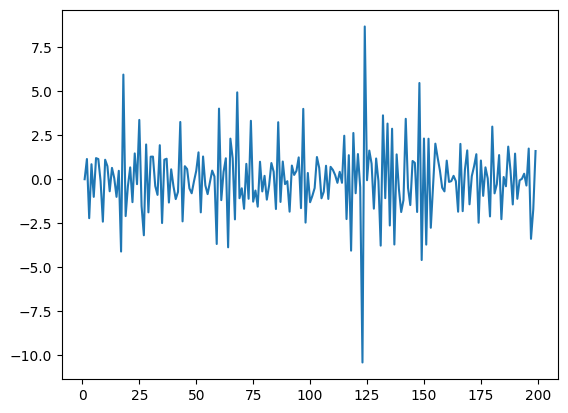

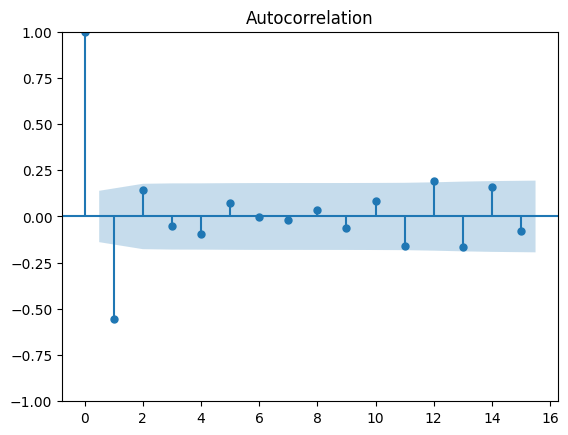

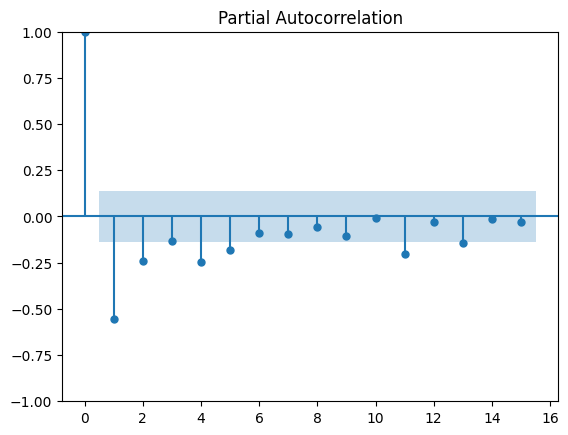

In [64]:
# In case we have to take some differences to the original series
z = y.diff().dropna()
# zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [65]:
box_test_1 = sm.stats.acorr_ljungbox(z, lags=[20])
print("Ljung-Box for z") 
print(box_test_1)
box_test_2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test_2)

Ljung-Box for z
       lb_stat     lb_pvalue
20  107.456044  5.702025e-14
Ljung-Box for z**2
      lb_stat  lb_pvalue
20  37.973912   0.008921


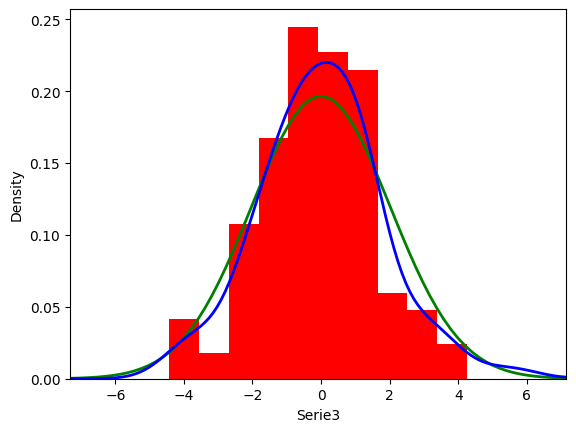

Saphiro ShapiroResult(statistic=np.float64(0.9485783421285777), pvalue=np.float64(1.457276645040239e-06))


In [66]:
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

# Analyzing the real time series

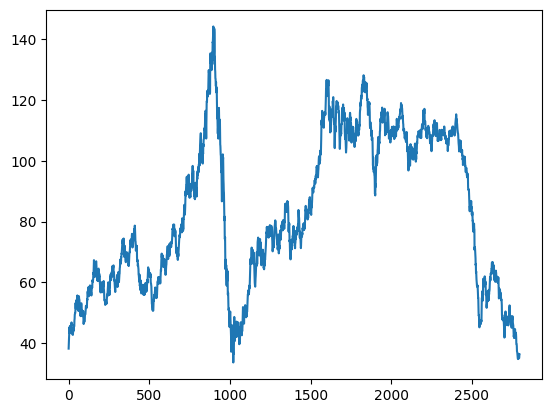

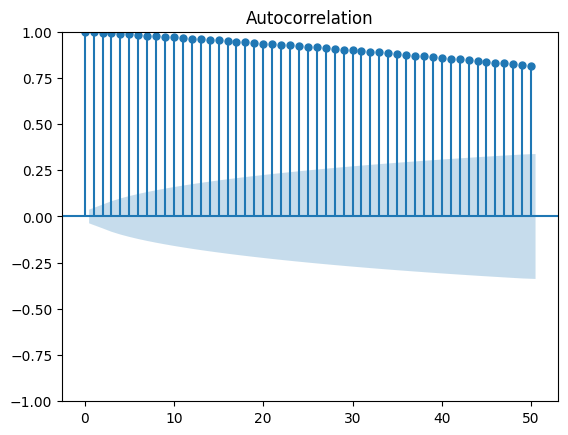

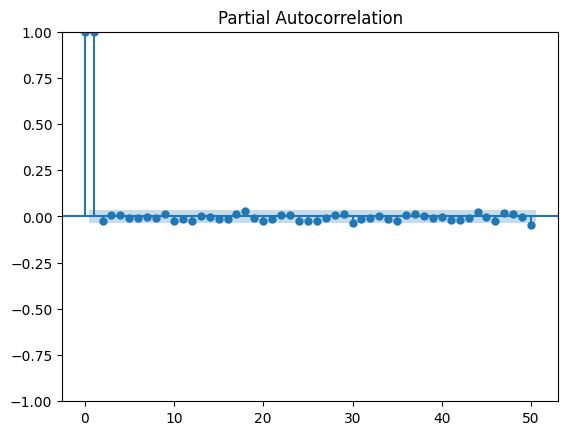

ADF test for the original series
Statistic Value: -1.592472132198039
p-value: 0.4873739076368584


In [67]:
data = pd.read_csv("Session2real.csv", sep = ";", decimal = ",")
# data = pd.read_csv("Individual_Homework.csv", sep = ";", decimal = ",")

spot = data.iloc[:,0]
y = spot

num_lags=50

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

In [68]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean 82.88516446192348 Standard deviation 25.300230244404094 Skewness 0.07624147173708391 Kurtosis -1.2732520490137378


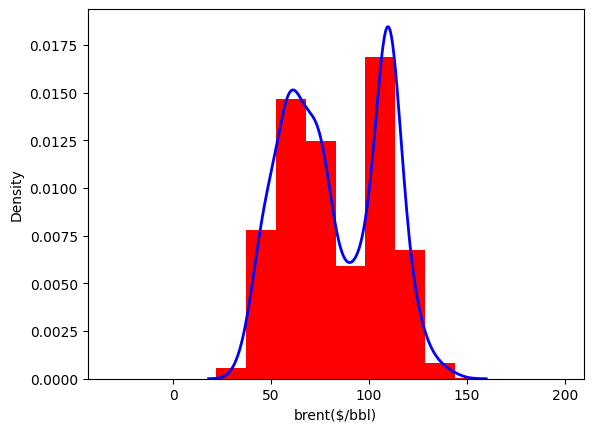

Saphiro ShapiroResult(statistic=np.float64(0.9431541124104814), pvalue=np.float64(1.5609758359061895e-31))
mean 82.88516446192348 std 25.300230244404094


In [69]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

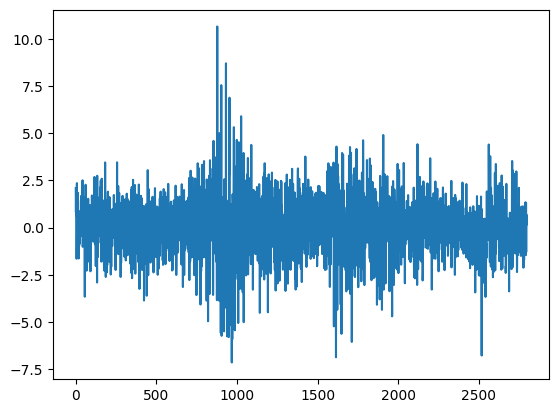

In [70]:
#returns = np.log(spot).diff().dropna() # we take log first and then one differente, diff(log(spot))
#z = returns
z = y.diff().dropna()

plt.plot(z)

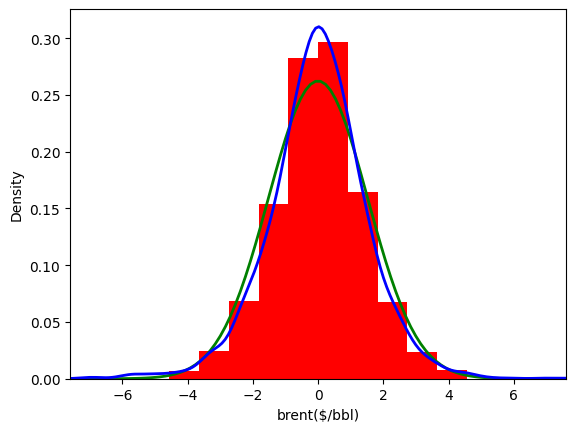

In [71]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

In [72]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(z)
std = np.std(z)
kurtosis = kurtosis(z)
skewness = skew(z)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean -0.0006795422031473529 Standard deviation 1.5203439274318031 Skewness -0.02160386419522025 Kurtosis 2.7345049419526504


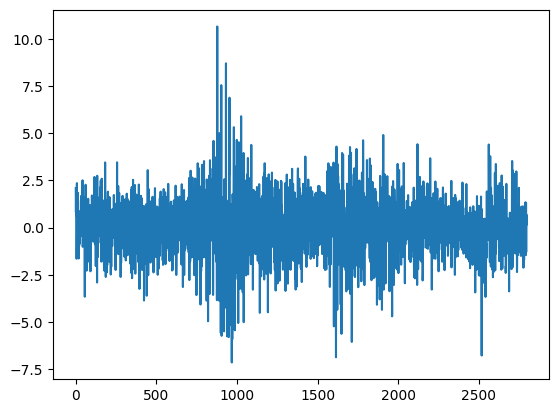

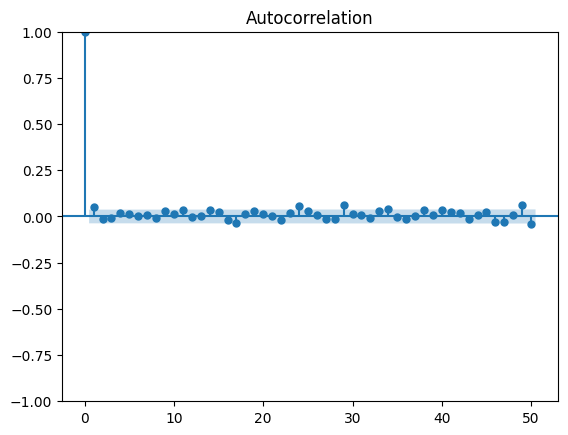

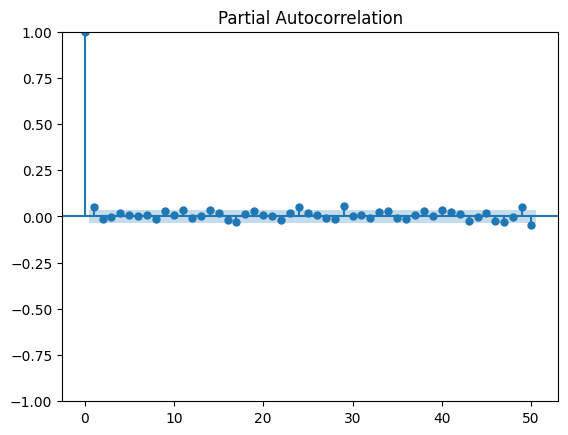

In [73]:
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [74]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])
print("Ljung-Box for z") 
print(box_test)


Saphiro ShapiroResult(statistic=np.float64(0.97638624998972), pvalue=np.float64(3.941575879098193e-21))
Ljung-Box for z
      lb_stat  lb_pvalue
50  98.436748   0.000052


In [75]:
import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test2)

Ljung-Box for z**2
       lb_stat      lb_pvalue
20  622.759486  4.592415e-119


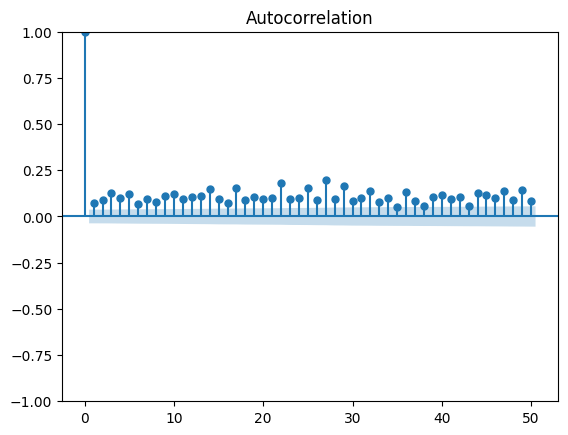

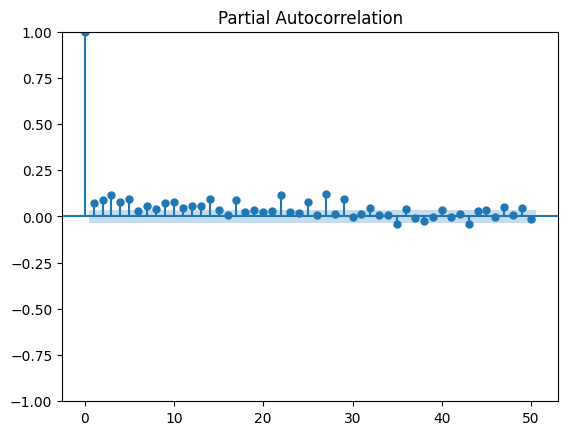

In [76]:
# plt.plot(z**2)
# plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()